# 1. Business Understanding

## Objective
Develop an app to predict bike rental demand, optimizing inventory management, improving customer satisfaction, and enhancing operational efficiency.

## Business Impact
- **Financial:** Reduce costs associated with bike maintenance and relocation.
- **Operational:** Streamline operations to ensure bike availability during peak hours.
- **Customer Satisfaction:** Enhance user experience by reducing bike shortages.

# 2. Data Understanding

## Importing the Dependencies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [3]:
df = pd.read_csv(r'SeoulBikeData.csv', encoding='latin1')

In [4]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
for col in df.columns:
    print(col, len(df[col].unique()), df[col].unique())

Date 365 ['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '04/02/2018' '05/02/2018' '06/02/2018' '07/02/2018' '08/02/2018'
 '09/02/2018' '10/02/2018' '11/02/2018' '12/02/2018' '13/02/2018'
 

In [8]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [9]:
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

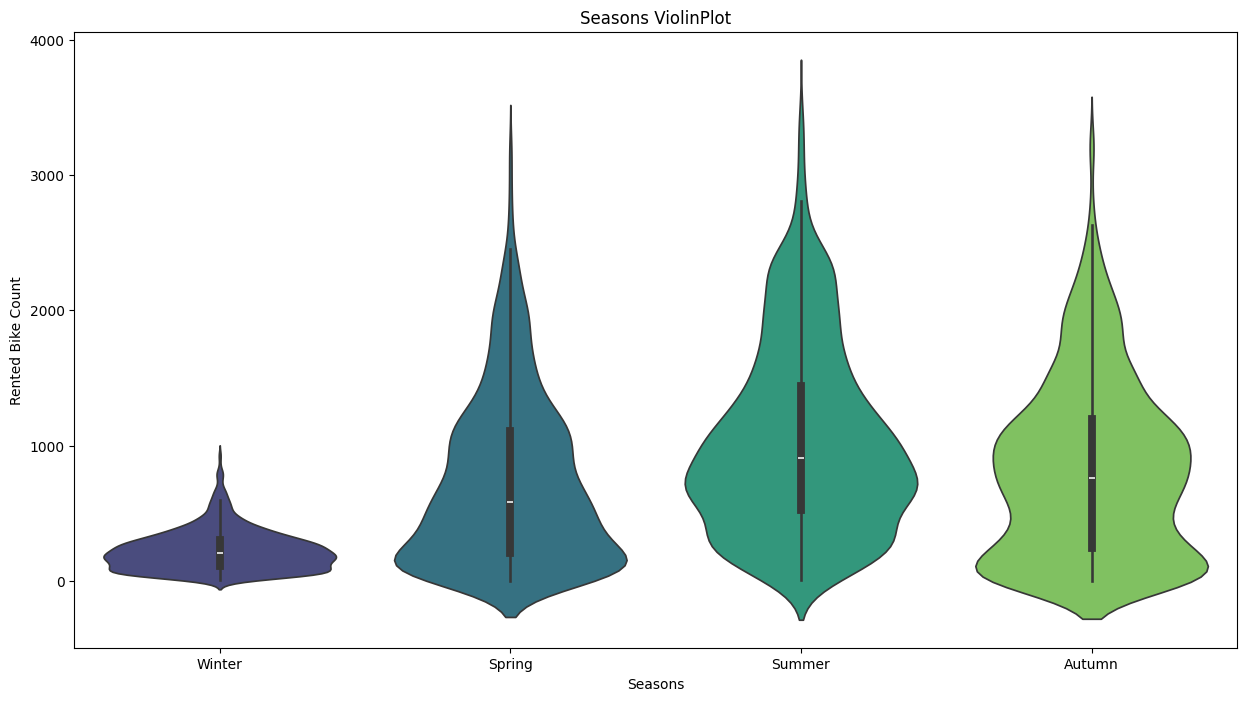

In [10]:
plt.figure(figsize=(15,8))
sns.violinplot(x='Seasons', y='Rented Bike Count', data=df, palette='viridis')
plt.title('Seasons ViolinPlot')
plt.show()

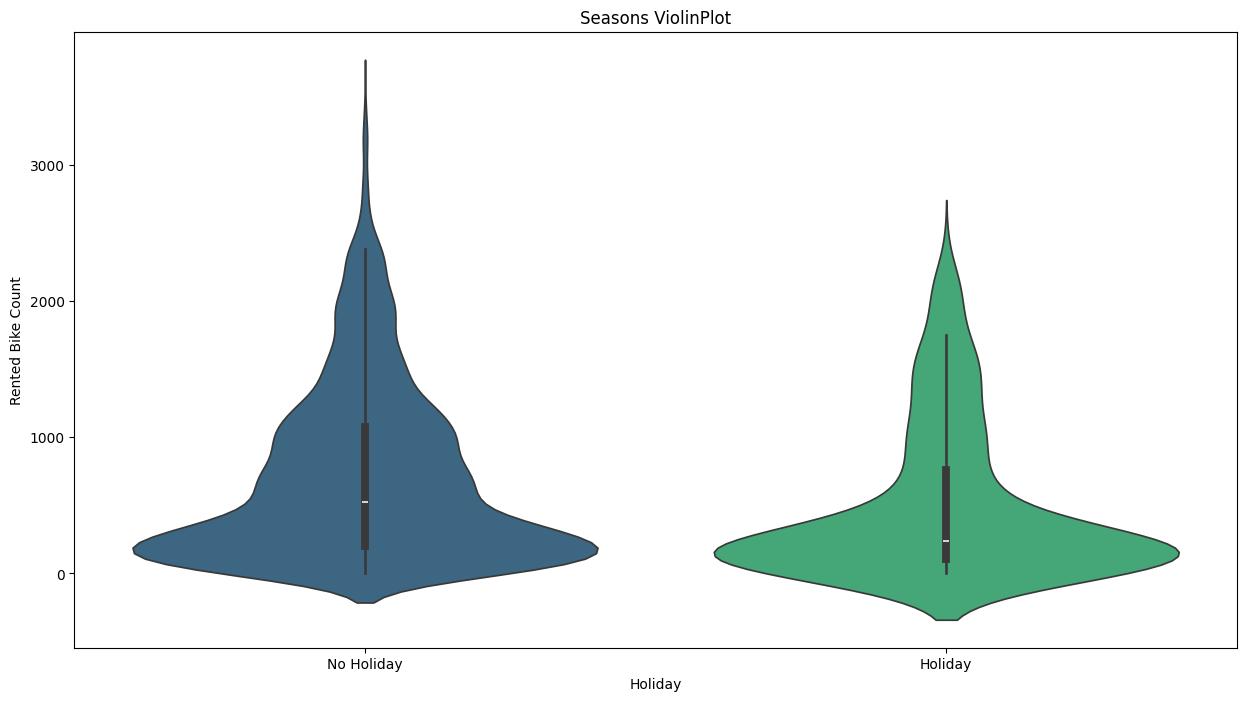

In [11]:
plt.figure(figsize=(15,8))
sns.violinplot(x='Holiday', y='Rented Bike Count', data=df, palette='viridis')
plt.title('Seasons ViolinPlot')
plt.show()

## Review Trends

In [12]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [13]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [14]:
df.dtypes

Date                         datetime64[ns]
Rented Bike Count                     int64
Hour                                  int64
Temperature(°C)                     float64
Humidity(%)                           int64
Wind speed (m/s)                    float64
Visibility (10m)                      int64
Dew point temperature(°C)           float64
Solar Radiation (MJ/m2)             float64
Rainfall(mm)                        float64
Snowfall (cm)                       float64
Seasons                              object
Holiday                              object
Functioning Day                      object
dtype: object

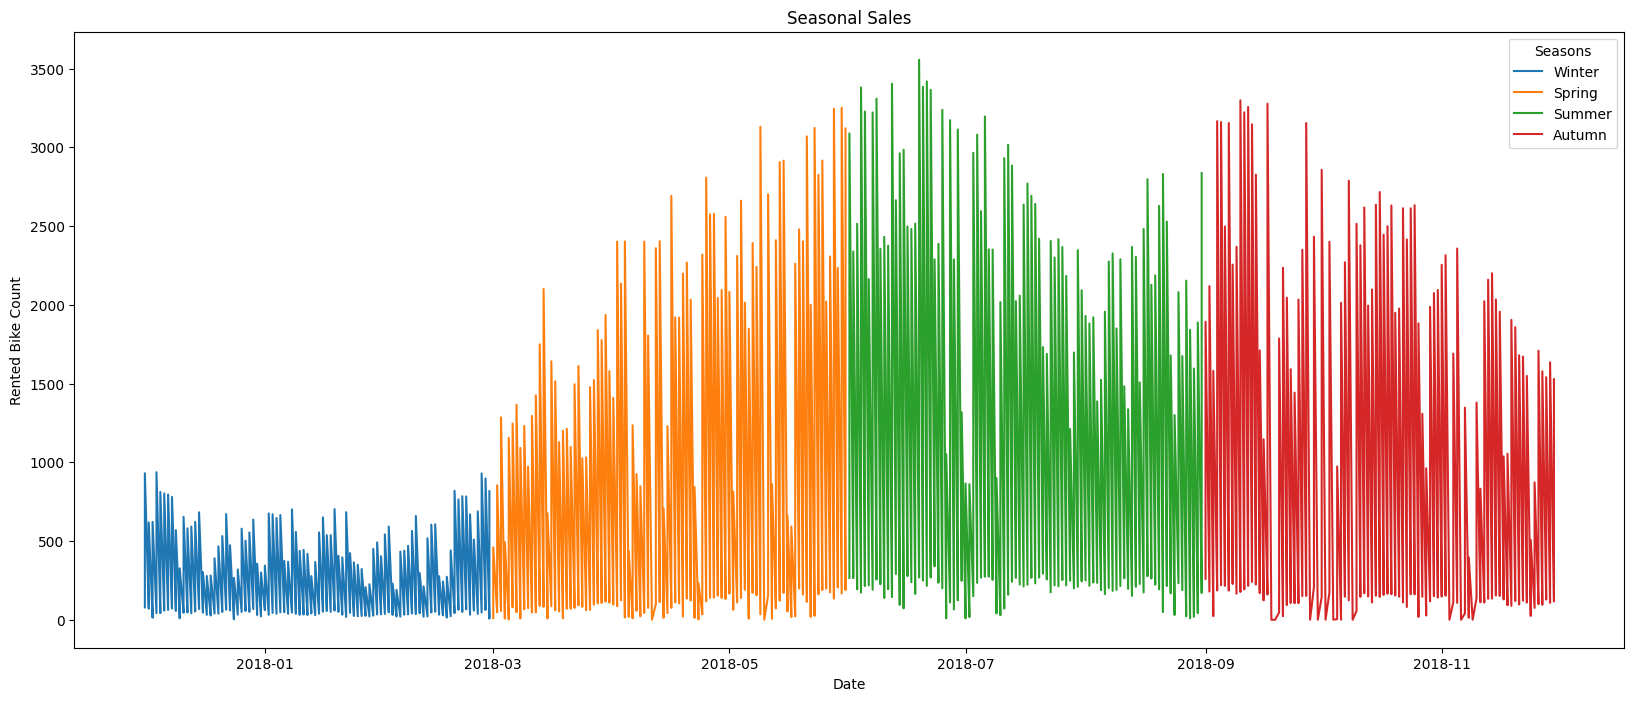

In [15]:
plt.figure(figsize=(20,8))
sns.lineplot(x='Date', y='Rented Bike Count', hue='Seasons', data=df, estimator=None)
plt.title('Seasonal Sales')
plt.show()

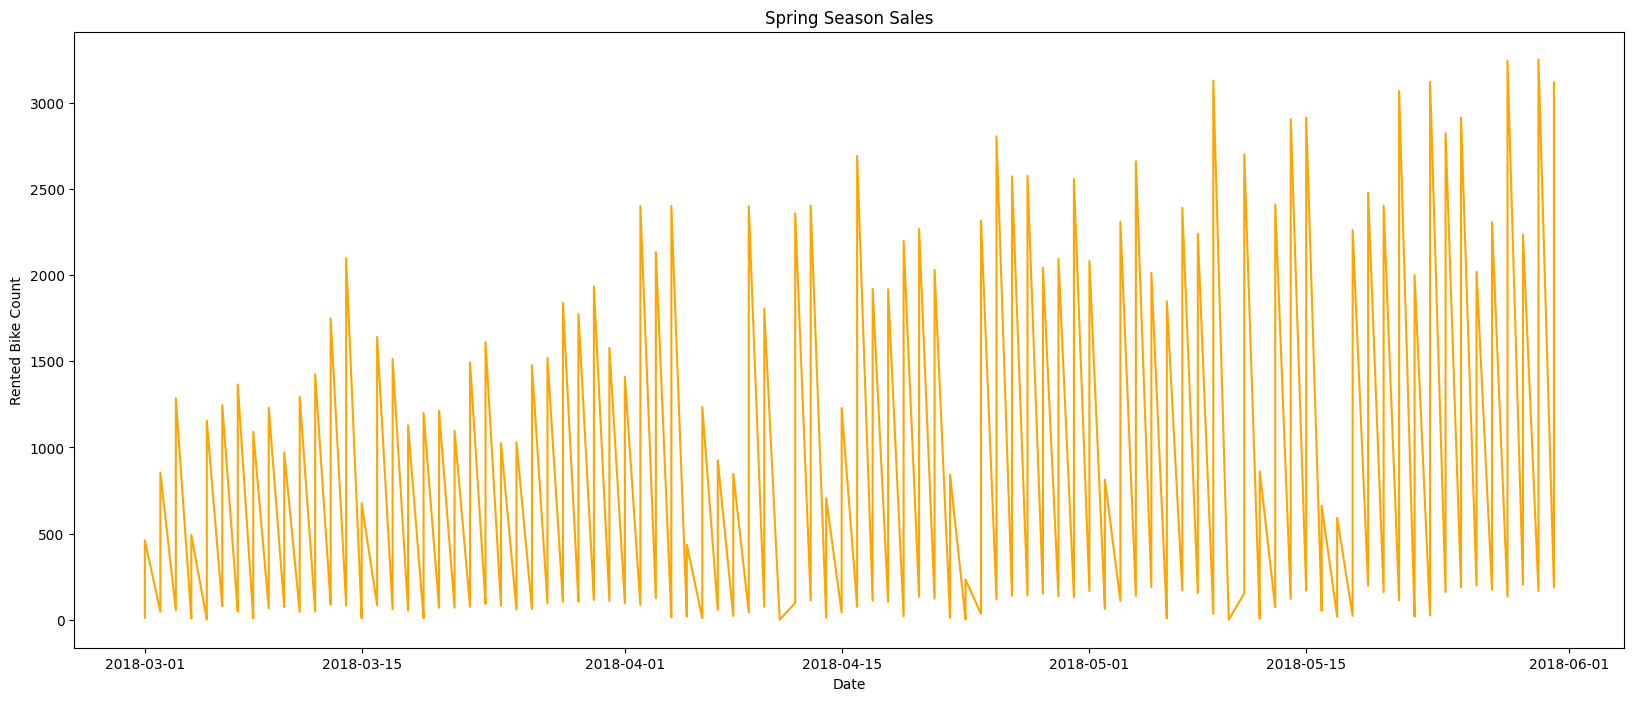

In [16]:
plt.figure(figsize=(20,8))
sns.lineplot(x='Date', y='Rented Bike Count', data=df[df['Seasons']=='Spring'], estimator=None, color='orange')
plt.title('Spring Season Sales')
plt.show()

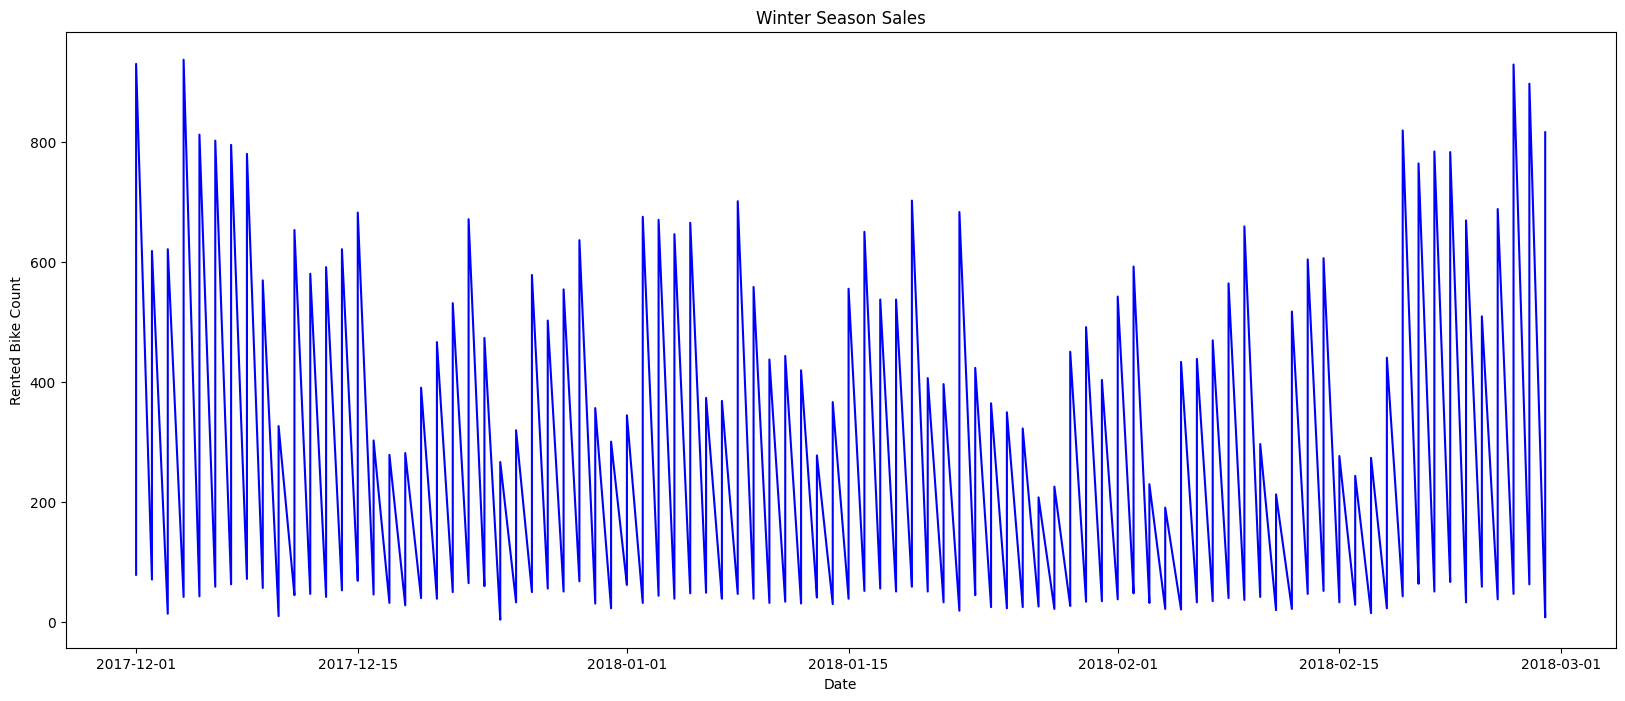

In [17]:
plt.figure(figsize=(20,8))
sns.lineplot(x='Date', y='Rented Bike Count', data=df[df['Seasons']=='Winter'], estimator=None, color='blue')
plt.title('Winter Season Sales')
plt.show()

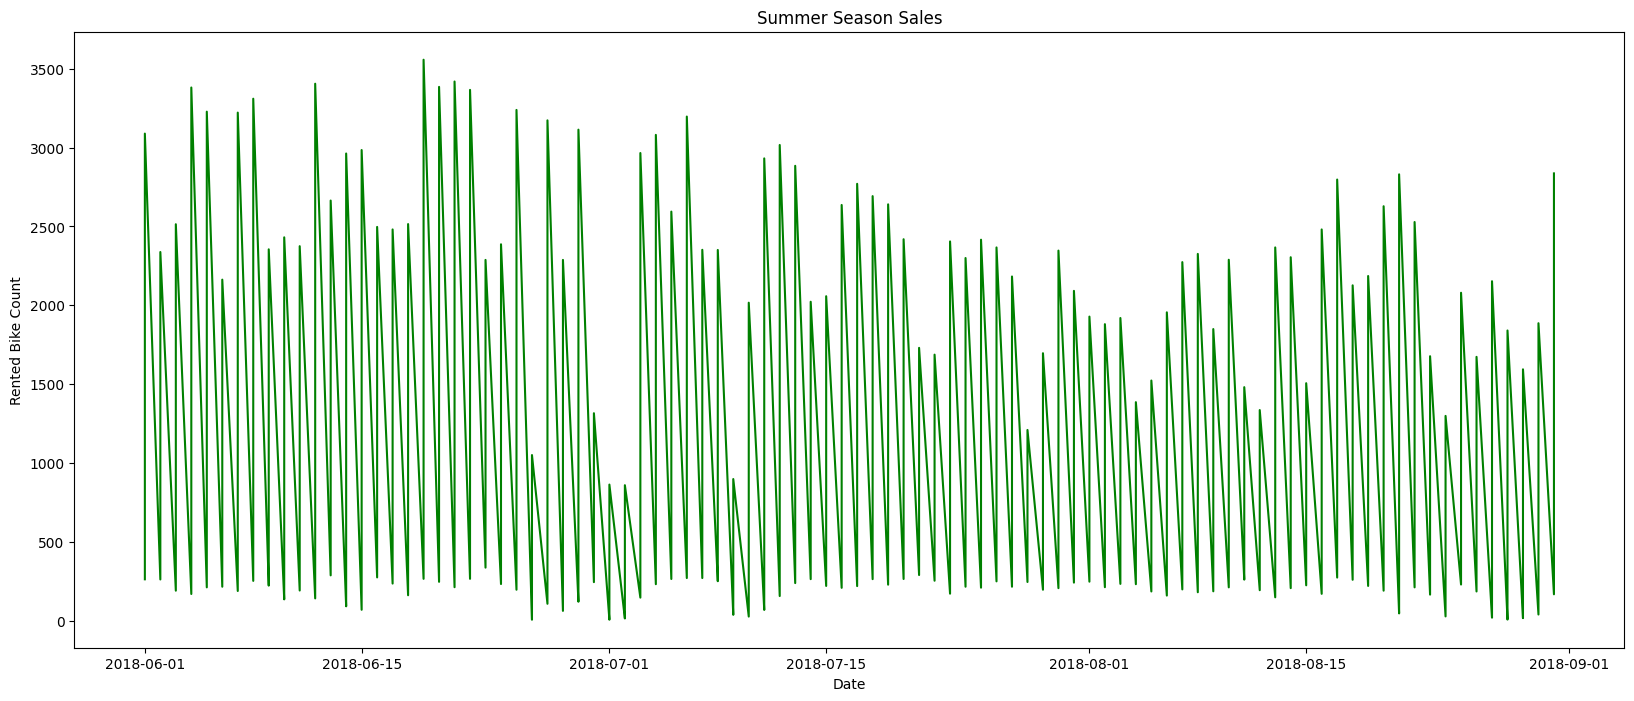

In [18]:
plt.figure(figsize=(20,8))
sns.lineplot(x='Date', y='Rented Bike Count', data=df[df['Seasons']=='Summer'], color='green', estimator=None)
plt.title('Summer Season Sales')
plt.show()

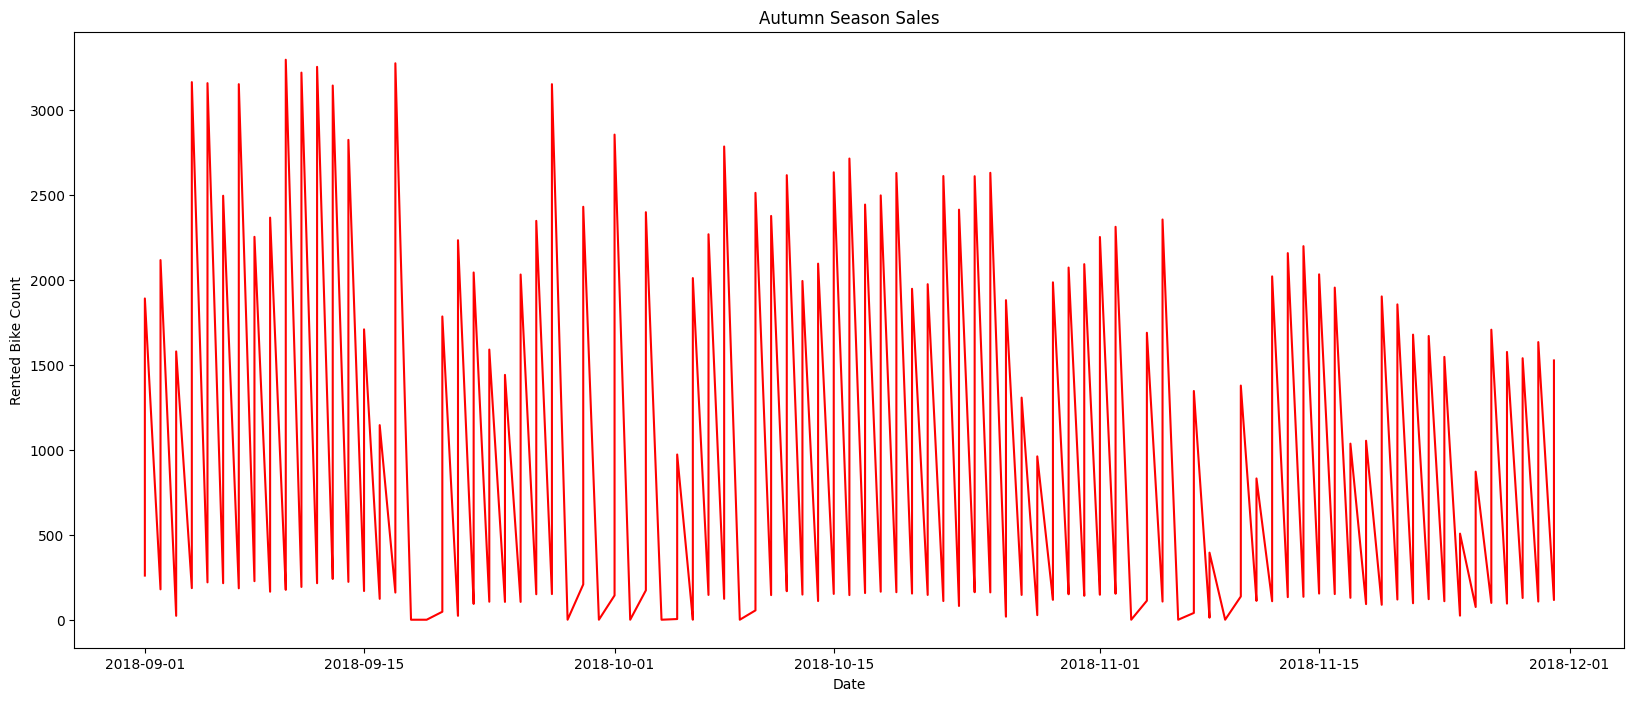

In [19]:
plt.figure(figsize=(20,8))
sns.lineplot(x='Date', y='Rented Bike Count', data=df[df['Seasons']=='Autumn'], color='red', estimator=None)
plt.title('Autumn Season Sales')
plt.show()

## Correlation

In [20]:
df['Month'] = df['Date'].dt.month

In [21]:
df['Day'] = df['Date'].dt.day

In [22]:
df['DayofWeek'] = df['Date'].dt.day_name()

In [23]:
df['DayofWeek'].unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

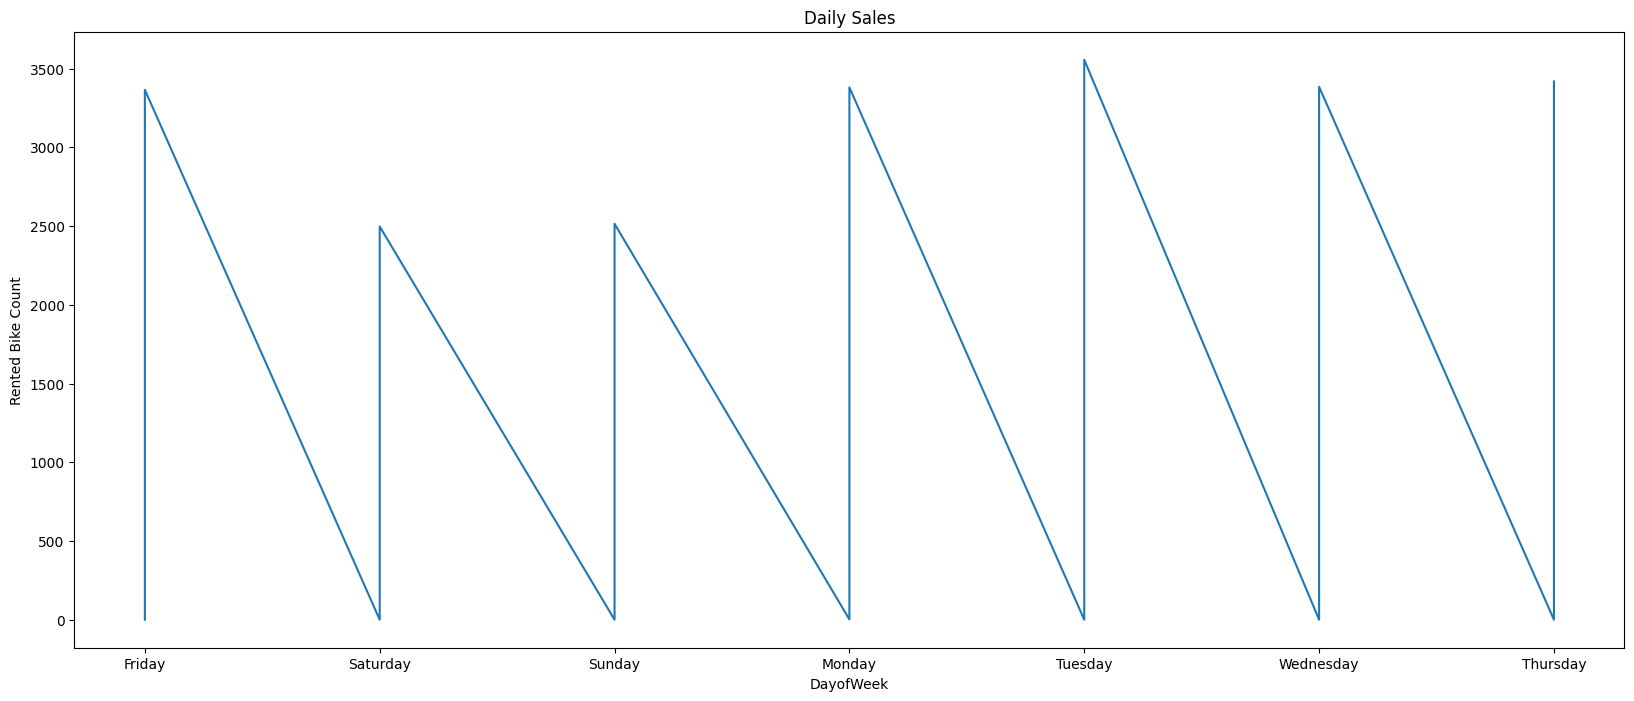

In [24]:
plt.figure(figsize=(20,8))
sns.lineplot(x='DayofWeek', y='Rented Bike Count', data=df,  estimator=None)
plt.title('Daily Sales')
plt.show()

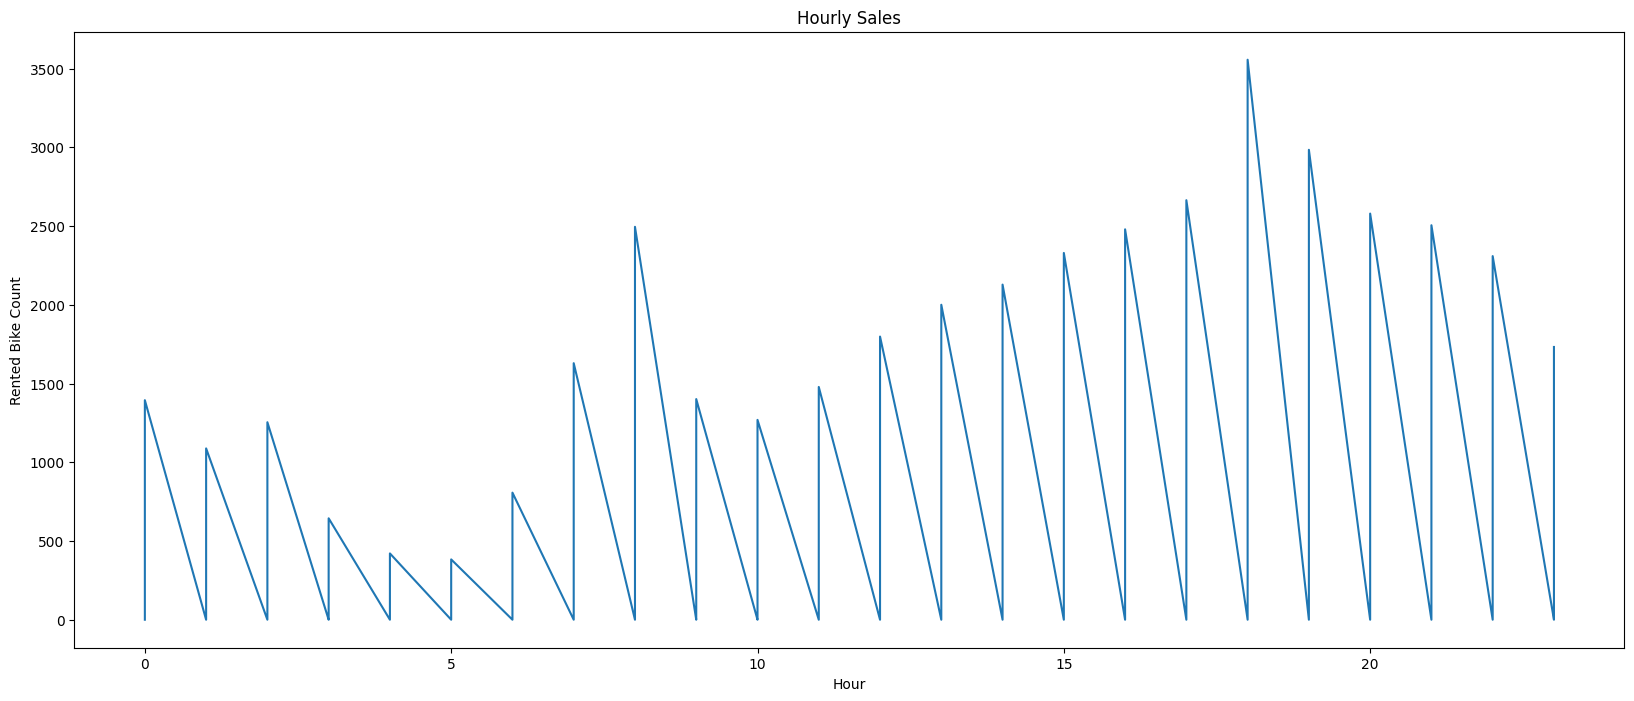

In [25]:
plt.figure(figsize=(20,8))
sns.lineplot(x='Hour', y='Rented Bike Count', data=df,  estimator=None)
plt.title('Hourly Sales')
plt.show()

In [26]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Month', 'Day', 'DayofWeek'],
      dtype='object')

In [27]:
corr = df[['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Rented Bike Count']].corr()
corr

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rented Bike Count
Hour,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,0.410257
Temperature(°C),0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,0.538558
Humidity(%),-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,-0.199780
Wind speed (m/s),0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,0.121108
Visibility (10m),0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,0.199280
Dew point temperature(°C),0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,0.379788
Solar Radiation (MJ/m2),0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,0.261837
Rainfall(mm),0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,-0.123074
Snowfall (cm),-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,-0.141804
Rented Bike Count,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,1.000000


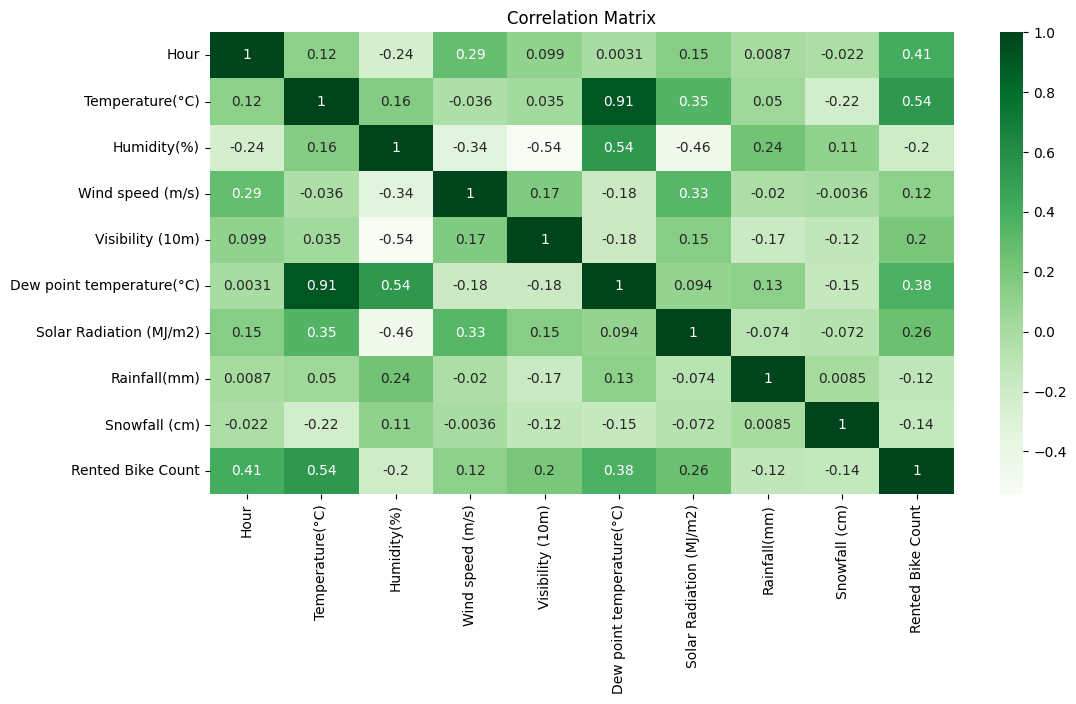

In [28]:
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, cmap='Greens')
plt.title('Correlation Matrix')
plt.show()

Remove Dew point temperature(°C) column as it has a very high correlation with Temperature(°C) column.

# 3. Data Preparation

In [29]:
df.dtypes

Date                         datetime64[ns]
Rented Bike Count                     int64
Hour                                  int64
Temperature(°C)                     float64
Humidity(%)                           int64
Wind speed (m/s)                    float64
Visibility (10m)                      int64
Dew point temperature(°C)           float64
Solar Radiation (MJ/m2)             float64
Rainfall(mm)                        float64
Snowfall (cm)                       float64
Seasons                              object
Holiday                              object
Functioning Day                      object
Month                                 int32
Day                                   int32
DayofWeek                            object
dtype: object

In [30]:
df.drop(['Date', 'Dew point temperature(°C)', 'Functioning Day'], inplace=True, axis=1)

In [31]:
df.dtypes

Rented Bike Count            int64
Hour                         int64
Temperature(°C)            float64
Humidity(%)                  int64
Wind speed (m/s)           float64
Visibility (10m)             int64
Solar Radiation (MJ/m2)    float64
Rainfall(mm)               float64
Snowfall (cm)              float64
Seasons                     object
Holiday                     object
Month                        int32
Day                          int32
DayofWeek                   object
dtype: object

In [32]:
df['Holiday'] = df['Holiday'].apply(lambda x: 0 if x == 'No Holiday' else 1)

# 4. Modelling

## Data Separation as X and Y

In [33]:
X = df.drop('Rented Bike Count', axis=1)
y = df['Rented Bike Count']

In [34]:
X

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Month,Day,DayofWeek
0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,0,12,1,Friday
1,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,0,12,1,Friday
2,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,0,12,1,Friday
3,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,0,12,1,Friday
4,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,0,12,1,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,0.0,0.0,0.0,Autumn,0,11,30,Friday
8756,20,3.4,37,2.3,2000,0.0,0.0,0.0,Autumn,0,11,30,Friday
8757,21,2.6,39,0.3,1968,0.0,0.0,0.0,Autumn,0,11,30,Friday
8758,22,2.1,41,1.0,1859,0.0,0.0,0.0,Autumn,0,11,30,Friday


In [35]:
categorical_cols = X[['Seasons', 'DayofWeek']]
numerical_cols = X[['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Month', 'Day']]

In [36]:
categorical_df = pd.get_dummies(categorical_cols).astype(int)

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()
numerical_df = pd.DataFrame(scaler.fit_transform(numerical_cols), columns=numerical_cols.columns)

In [39]:
X = pd.concat([categorical_df, numerical_df, X['Holiday']], axis=1)

In [40]:
X

,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,DayofWeek_Friday,DayofWeek_Monday,DayofWeek_Saturday,DayofWeek_Sunday,DayofWeek_Thursday,DayofWeek_Tuesday,...,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Day,Holiday
0,0,0,0,1,1,0,0,0,0,0,...,-1.513957,-1.042483,0.458476,0.925871,-0.655132,-0.1318,-0.171891,1.587648,-1.673503,0
1,0,0,0,1,1,0,0,0,0,0,...,-1.539074,-0.993370,-0.892561,0.925871,-0.655132,-0.1318,-0.171891,1.587648,-1.673503,0
2,0,0,0,1,1,0,0,0,0,0,...,-1.580936,-0.944257,-0.699556,0.925871,-0.655132,-0.1318,-0.171891,1.587648,-1.673503,0
3,0,0,0,1,1,0,0,0,0,0,...,-1.597680,-0.895144,-0.796059,0.925871,-0.655132,-0.1318,-0.171891,1.587648,-1.673503,0
4,0,0,0,1,1,0,0,0,0,0,...,-1.580936,-1.091596,0.554978,0.925871,-0.655132,-0.1318,-0.171891,1.587648,-1.673503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1,0,0,0,1,0,0,0,0,0,...,-0.726961,-1.189822,0.844486,0.751605,-0.655132,-0.1318,-0.171891,1.297612,1.623357,0
8756,1,0,0,0,1,0,0,0,0,0,...,-0.793939,-1.042483,0.554978,0.925871,-0.655132,-0.1318,-0.171891,1.297612,1.623357,0
8757,1,0,0,0,1,0,0,0,0,0,...,-0.860918,-0.944257,-1.375075,0.873263,-0.655132,-0.1318,-0.171891,1.297612,1.623357,0
8758,1,0,0,0,1,0,0,0,0,0,...,-0.902779,-0.846031,-0.699556,0.694064,-0.655132,-0.1318,-0.171891,1.297612,1.623357,0


## Data Splitting

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [43]:
print(X.shape, X_train.shape, X_test.shape)

(8760, 22) (7008, 22) (1752, 22)


## Importing Dependencies

In [44]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [45]:
pipelines = {
    'rf': make_pipeline(RandomForestRegressor(random_state=2)),
    'gb': make_pipeline(GradientBoostingRegressor(random_state=2)),
    'ridge': make_pipeline(Ridge(random_state=2)),
    'lasso': make_pipeline(Lasso(random_state=2)),
    'enet': make_pipeline(ElasticNet(random_state=2)) 
}

In [46]:
hypergrid = {
    'rf': {
        'randomforestregressor__min_samples_split':[2,4,6],
        'randomforestregressor__min_samples_leaf':[1,2,3]
    },
    'gb': {
        'gradientboostingregressor__alpha':[0.001, 0.005, 0.01, 0.1, 0.5, 0.99]
    },
    'ridge': {
        'ridge__alpha':[0.001, 0.005, 0.01, 0.1, 0.5, 0.99]
    },
    'lasso': {
        'lasso__alpha':[0.001, 0.005, 0.01, 0.1, 0.5, 0.99]
    },
    'enet': {
        'elasticnet__alpha':[0.001, 0.005, 0.01, 0.1, 0.5, 0.99]
    }
}

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError

In [49]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hypergrid[algo], cv=10, n_jobs=-1)
    try:
        print('Starting training for {}.'.format(algo))
        model.fit(X_train, y_train)
        fit_models[algo] = model
        print('{} has been successfully fit.'.format(algo))
    except NotFittedError as e:
        print(repr(e))

Starting training for rf.
rf has been successfully fit.
Starting training for gb.
gb has been successfully fit.
Starting training for ridge.
ridge has been successfully fit.
Starting training for lasso.
lasso has been successfully fit.
Starting training for enet.
enet has been successfully fit.


In [50]:
fit_models['rf'].predict(X_test)

array([ 687.08,   88.36, 1863.71, ..., 1659.59, 1394.95,   94.06])

# 5. Evaluation

In [51]:
from sklearn.metrics import r2_score, mean_absolute_error

In [52]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print('{} scores - R2:{} MAE:{}'.format(algo, r2_score(y_test, yhat), mean_absolute_error(y_test, yhat)))

rf scores - R2:0.8682802970471555 MAE:127.97123287671234
gb scores - R2:0.7928116976041231 MAE:182.33318230709722
ridge scores - R2:0.497752501127665 MAE:332.11624343701374
lasso scores - R2:0.4980463687781882 MAE:331.8144969157706
enet scores - R2:0.4977882797159724 MAE:331.8684360937693


In [53]:
best_model = fit_models['rf']

# 6. Deployment

## Saving the Model

In [54]:
import pickle

In [55]:
filename = 'model.sav'
pickle.dump(best_model, open(filename, 'wb'))